

```
Import necessary libraries
```



In [ ]:
!pip install tensorflow

In [60]:
import numpy as np
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models



```
Load the dataset(image)
```



In [61]:
image_folder = "/content/sample_data/Images"



```
Preprocess the images by iterating through the directory
```



In [62]:
images = []
titles = []

for i, filename in enumerate(os.listdir(image_folder)):
    if filename.endswith((".jpg", ".jpeg", ".png")):

        image_path = os.path.join(image_folder, filename)

        img = image.load_img(image_path)
        images.append(img)
        titles.append(f"Image {i + 1}")



```
Function to display images in a grid (optional)
```



In [72]:
def display_images(images, titles=None, cols=3):
    n_images = len(images)
    rows = (n_images + cols - 1)

    fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 3))
    axes = axes.flatten()

    for i in range(rows * cols):
        if i < n_images:
            axes[i].imshow(images[i])
            axes[i].axis('off')
            if titles:
              if i < len(titles):
                axes[i].set_title(titles[i], fontsize=12)
        else:
            axes[i].axis('off')



```
 Display the images
```



<Figure size 640x480 with 0 Axes>

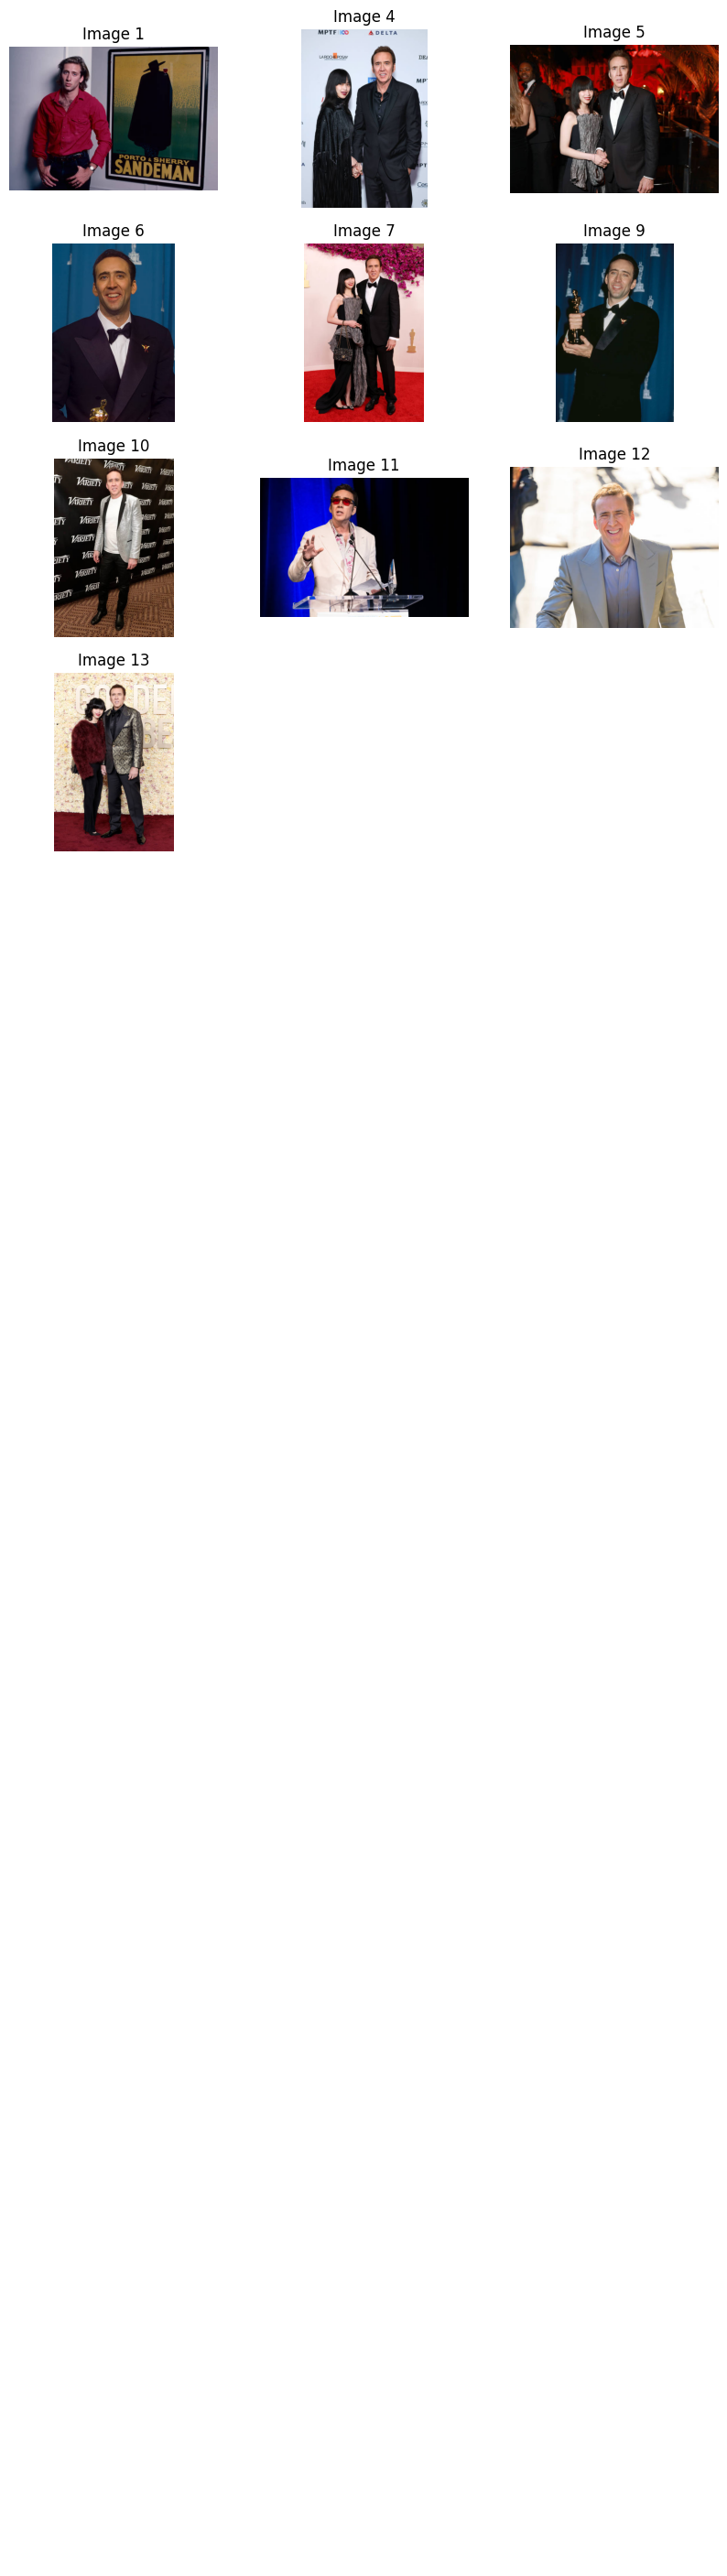

In [73]:
plt.tight_layout()
plt.show()
display_images(images,titles=titles,cols=3)

In [74]:
cv2.imread(image_path).shape

(612, 408, 3)

In [87]:
train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [76]:
train_dir = '/content/sample_data/Images/train/'
validation_dir = '/content/sample_data/Images/validation/'


train_dataset = train.flow_from_directory(train_dir,
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')
validation_dataset = validation.flow_from_directory(validation_dir,
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

Found 41 images belonging to 3 classes.
Found 20 images belonging to 3 classes.


In [82]:
model = models.Sequential([
    layers.Input(shape=(200, 200, 3)),

    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),

    layers.Dense(3, activation='softmax')

])

In [83]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(learning_rate = 0.001),
              metrics=['accuracy'])

In [84]:
model.fit(train_dataset, epochs=10, validation_data=(validation_dataset))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.6186 - loss: 6.0245 - val_accuracy: 0.4000 - val_loss: 0.8196
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.7043 - loss: 0.5800 - val_accuracy: 0.7500 - val_loss: 0.7003
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.6107 - loss: 0.8160 - val_accuracy: 0.4000 - val_loss: 0.7992
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - accuracy: 0.7322 - loss: 0.6459 - val_accuracy: 0.4000 - val_loss: 1.3347
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.7116 - loss: 0.7584 - val_accuracy: 0.7500 - val_loss: 0.6268
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.7557 - loss: 0.7234 - val_accuracy: 0.4000 - val_loss: 0.8054
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 333ms/step - accuracy: 0.7378 - loss: 0.5158 - val_accuracy: 0.6500 - val_loss: 0.4948
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.7291 - loss: 0.9111 - val_accuracy: 0.4000 - val_

In [85]:
train_dataset.class_indices

{'.ipynb_checkpoints': 0, 'Nicolas': 1, 'NotNicolas': 2}

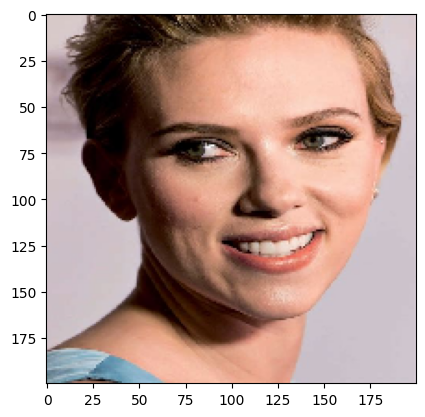

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
This is not Nicolas Cage


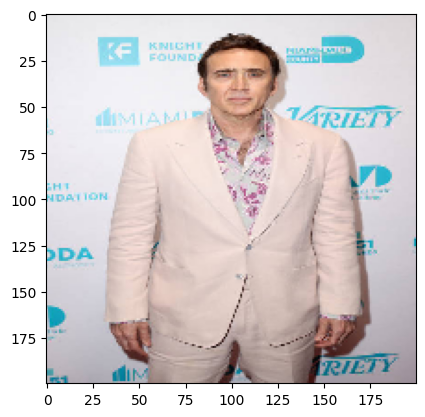

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
This is not Nicolas Cage


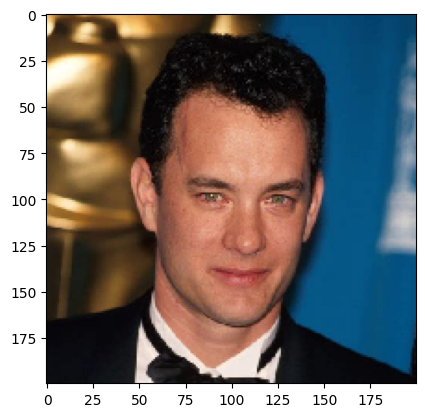

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
This is not Nicolas Cage


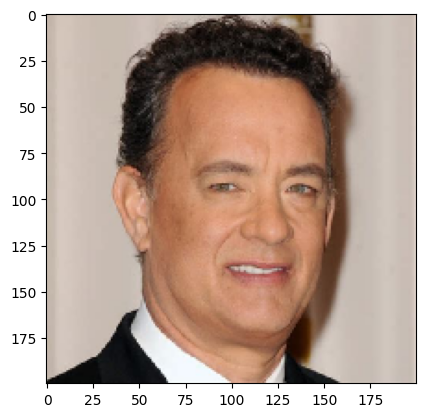

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This is not Nicolas Cage


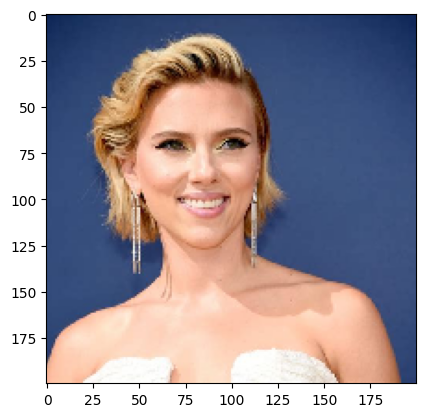

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
This is not Nicolas Cage


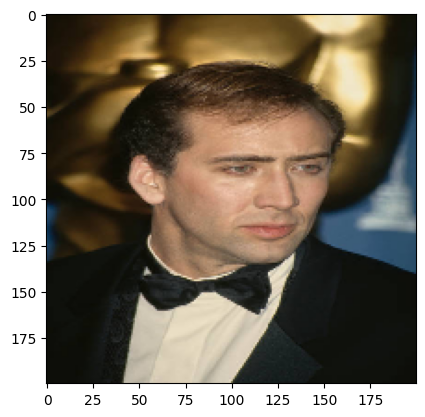

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
This is not Nicolas Cage


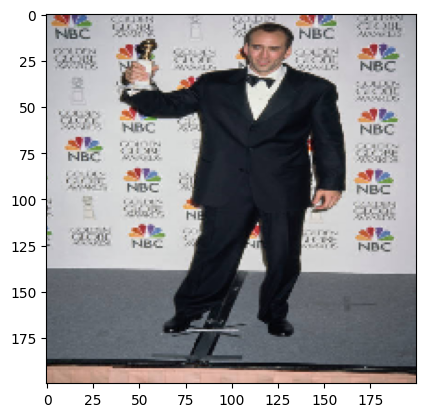

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
This is not Nicolas Cage


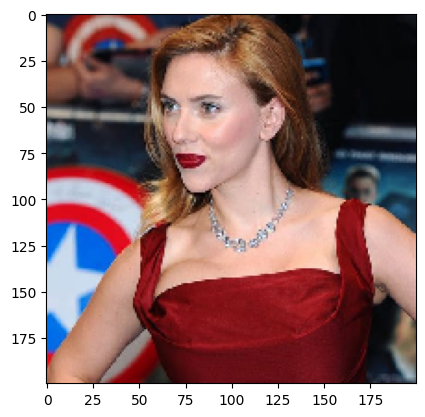

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
This is not Nicolas Cage


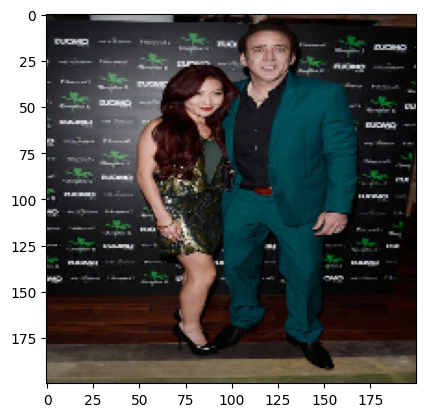

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
This is not Nicolas Cage


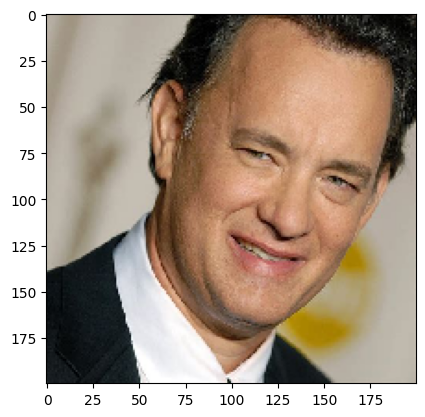

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This is not Nicolas Cage


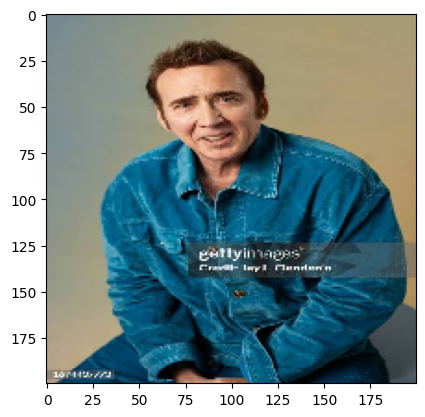

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
This is not Nicolas Cage


In [100]:
from re import X
test_dir = '/content/sample_data/test'

for i in os.listdir(test_dir):
  img = image.load_img(test_dir+'/'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])
  y_pred = model.predict(images)
  predicted_class_index = np.argmax(y_pred, axis=0)[0]

  if predicted_class_index == 0:
    print("This is not Nicolas Cage")
  elif predicted_class_index == 1:
    print("This is Nicolas Cage")
  elif predicted_class_index == 2:
    print("This is not Nicolas Cage")